In [127]:
# Importing Packages
#Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#Computational and Visualisation packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
#Custom plot display function
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [129]:
#Loading the requisite dataset
df = pd.read_csv('gapminder_dataset.csv')
df_columns = df.columns
# Array for feature and target variables
X = df.fertility.values
y = df.life.values

In [130]:
# Dimensions before reshape
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshaping X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Dimensions after reshape
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [131]:
# Split of the main dataset into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [132]:
# Linear Regression
reg_all = LinearRegression()

# Fitting the regressor on the training dataset
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.729898736091
Root Mean Squared Error: 4.19402791411


In [133]:
#5 Fold Cross Validation Evaluation
reg = LinearRegression()
cv_scores_5fold = cross_val_score(reg, X, y, cv=5 )
print(cv_scores_5fold)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_5fold)))

[ 0.71001079  0.75007717  0.55271526  0.547501    0.52410561]
Average 5-Fold CV Score: 0.616881964443


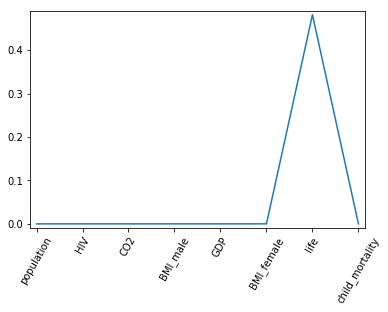

In [134]:
#Lasso Regularization
X = df.drop('fertility',1)
y = df.life
df_columns = df.drop('fertility',1).columns

# Instantiating a lasso regressor
lasso = Lasso(alpha=0.4, normalize=True)
# Fit the regressor to the data
lasso = Lasso(alpha=0.4, normalize=True)
lasso = lasso.fit(X, y)
lasso
lasso_coef = lasso.coef_
lasso_coef
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [135]:
#Ridge Regularization

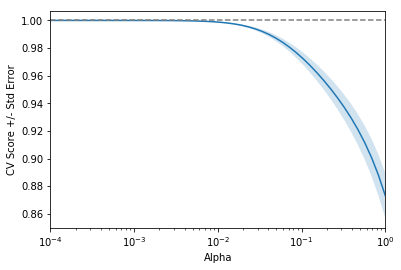

In [136]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Initialize a ridge regressor
ridge = Ridge(normalize=True)

for alpha in alpha_space:
    
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)